# Dealing with unsanitized data

One of the biggest challenges with analyzing/using data is that it is often unsanitized. There are inconsistency in they way data within a field is represented and entries missing data.

In this documen we will go through an example of dealing with unsanitized data. We will be using data from the follwoing url: https://data.norge.no/data/bouvet-asa/skoler-og-klasser-som-har-meldt-seg-p%C3%A5-kodetimen. It contains information about schools and classes that have signed up for coding-lessions.

Let us start by looking at the data. We will import and display the data using pandas

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('kodetime.csv')
print(data.head())

      _id                       school                  address  \
0  104875       6 Narvik Speidergruppe       Dronningensgate 68   
1  104100               Abelvær, Norge                            
2  104214              Ådalsbruk skole             Olarovegen 1   
3  103853  Akersveien Kanvas-barnehage  Westye Egebergs gate 11   
4  104673              Ål ungdomsskule           Sundrevegen 42   

                                               level          levels  year  \
0                                a:1:{i:0;s:2:"5.";}              5.  2016   
1      a:3:{i:0;s:2:"5.";i:1;s:2:"6.";i:2;s:2:"7.";}        5.,6.,7.  2016   
2  a:5:{i:0;s:2:"1.";i:1;s:2:"2.";i:2;s:2:"3.";i:...  1.,2.,3.,4.,7.  2016   
3                         a:1:{i:0;s:9:"Barnehage";}       Barnehage  2016   
4                   a:2:{i:0;s:2:"9.";i:1;s:2:"8.";}           9.,8.  2016   

  locality          county students                 post_date    pos_lat  \
0   Narvik        Nordland       15  2016-11-21T15:5

Let's say that we are intereste in finding out which county has the most signed up students. We make use of groupby and aggregate to find the answer.

In [3]:
grouped_data = data.groupby('county')
aggregated_data = grouped_data['students'].aggregate(sum)
print(aggregated_data.sort_values(ascending=False))

county
Oslo                7140187843061552321105168180-91242321464825103...
Akershus            6910923262478881134623017545233451704527472523...
Hedmark             6861576813251717253647212186132165745202505226...
Sør-Trøndelag       6795824217224712011232020183648468415789108121...
Troms               6681501940269229148113417212326321412343404552...
Finnmark                      628921512181171422172521258741670103176
Vestfold            5158402616204846259636026472113825080468254010...
Nord-Trøndelag      4454922720032651333313123932909019222336562727...
Oppland             3239908543253271653411827601714101238113012297...
Telemark            2410311941603018462964261121016554504502468641...
Møre og Romsdal     2314318182853618817458901226341255248190601418...
Østfold             2239155374912113579547383323718158120144545156...
Hordaland           2234182543101510915471623823597741582141582766...
Sogn og Fjordane    2044133314432354583648229732746192125461015361...
Vest-Agder   

well.. There is obviously something wrong here. The output contains a clue, namly that the data type is object. If we look at the students column it seems like each entry is an integer. Pandas is able to infer the datatype, unless there is inconsistencies. Let us try to convert the column to integer.

In [4]:
data['students'] = pd.to_numeric(data['students'])

ValueError: Unable to parse string "51  elever " at position 809

Unable to parse string "51  elever ". The data is stored in different ways, what a shame. Some of the entries contains 'elever'. This is the pain in dealing with data created by others. You would of course never do anything like this!

We have found the cause, now what do we do? There are two options.

1. Ignore the entries causing problems.
2. Modify the entries by removing 'elever'.

Which to choose depends on the application. If you need an accurate tall of the number of students you should do 2. However if you are only interested in a estimate to get a impression 1 should work well. (And I am too lazy to implement a filtering function, do it yourself)

In [5]:
data['students'] = pd.to_numeric(data['students'], 'coerce')

From the documentation: If ‘coerce’, then invalid parsing will be set as NaN.

Now let ut try to sort the counties based on the number of students.

In [6]:
grouped_data = data.groupby('county')
aggregated_data = grouped_data['students'].aggregate(sum)
print(aggregated_data.sort_values(ascending=False))

county
Akershus            16687.0
Oslo                13343.0
Buskerud            13270.0
Hordaland           13211.0
Rogaland            11186.0
Vestfold             6415.0
Møre og Romsdal      5740.0
Nordland             5118.0
Sør-Trøndelag        4992.0
Østfold              4323.0
Telemark             3166.0
Sogn og Fjordane     2707.0
Oppland              2447.0
Hedmark              2367.0
Nord-Trøndelag       2315.0
Aust-Agder           2212.0
Vest-Agder           1832.0
Troms                1224.0
Finnmark             1021.0
Name: students, dtype: float64


That is the end!

Included some plotting below to show how powerful pandas is :)

In [7]:
import matplotlib.pyplot as plt

In [8]:
data.groupby('county')['students'].aggregate(sum).sort_values(ascending=False).plot(kind="bar")

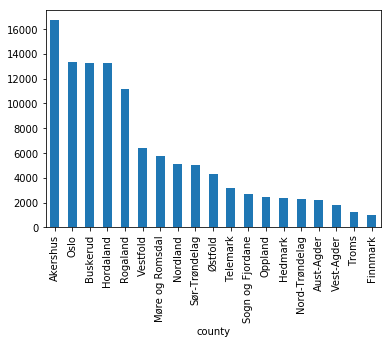

In [9]:
plt.show()